# [Udacity Nanodegree: Data Science] Boston AirBNB
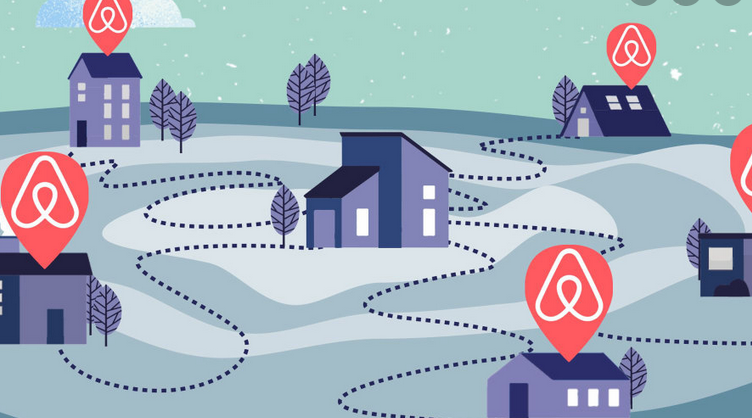
## Table of content
#### 1. Introduction ・ Objective
#### 2. Libraries 
#### 3. Datasets
#### 4. Business Understading ・ Data understanding (EDA)  ・  Data preparation
#### 5. Model ・ Results
>- Question 1: Consider the Correlations between Price and Other Features
>- Question 2: Formulate a model to Predict Price using Linear Regression Algorithm
>- Question 3: The most frequent n_grams in Review dataset's comments
>- Question 4: Distribution of Price, Listing Supply and Listing Demand

#### 6. Future work





## 1. Introduction ・ Objective
This is my first project for Udacity Data Science Nanodegree and it is to understand some insights and to check the feature correlations of Boston AirBnB data.
The project focuses on 4 following questions:
>- Question 1: Correlations between Price and other Features
>- Question 2: Model formulation to predict Price using Linear Regression Algorithm
>- Question 3: The most frequent n_grams in Review dataset's comments
>- Question 4: Distribution of Price, Listing Supply and Listing Demand


The CRISP-DM methodology is used to build this data science project, including:
>- Business Understanding
>- Data Understanding
>- Prepare Data
>- Model Data
>- Results


## 2. Libraries
#### In this project, some basic libraries to process datasets (pandas), linear algebra (numpy), to display charts and graphs (matplotlib.pyplot) are imported.

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import nltk, re, string, collections
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


## 3. Importing datasets

Three datasets are imported in this project:
>- calendar_df
>- listing_df
>- review_df

In [ ]:
# Read CSV files
calendar_df = pd.read_csv("/kaggle/input/boston/calendar.csv")
listing_df = pd.read_csv("/kaggle/input/boston/listings.csv")
review_df = pd.read_csv("/kaggle/input/boston/reviews.csv")

## 4. Business Understading ・ Data understanding (EDA)  ・ Data Preparation

AirBNB is founded in 2008 and there are millions of hosts and travelers choosing to list their space and book unique accommodations anywhere in the world. Understanding the factors that drive the listing price or the seasonality of using the renting service is needed.
In this project, I accessed the data of AirBNB house in Boston which show the listing availability calendar from 2016 September to 2017 September; the listings' basic information; and the visitors' comments from 2009 March to 2016 September.

### 4.1. Quick look

### Listing availability calendar

In [ ]:
calendar_df.info()

In [ ]:
calendar_df.head()

### Listing information

In [ ]:
listing_df.info()

In [ ]:
pd.set_option('display.max_columns', None) #This helps all column names be displayed
listing_df.head(2)

### Reviews of visitors

In [ ]:
review_df.info()

In [ ]:
review_df.head()

## 4.2 Data wrangling
In this steps, I have done following steps:
>- Drop the duplicates in the datasets
>- Check null values in the datasets
>- Filter the calendar
>- Convert to datetime, numeric value

In [ ]:
# Drop the duplicates in the datasets
calendar_df.drop_duplicates(keep=False,inplace=True)
listing_df.drop_duplicates(keep=False,inplace=True)
review_df.drop_duplicates(keep=False,inplace=True)

In [ ]:
# Check null values in the datasets
calendar_df_nulls = set(calendar_df.columns[calendar_df.isnull().any()])
listing_df_nulls = set(listing_df.columns[listing_df.isnull().any()])
review_df_nulls = set(review_df.columns[review_df.isnull().any()])
print ("the columns having null values in calendar_df is: ", calendar_df_nulls)
print ("the columns having null values in listing_df is: ", listing_df_nulls)
print ("the columns having null values in review_df is: ", review_df_nulls)

In [ ]:
# Filter the calendar when the listings were available
avail_calendar = calendar_df[calendar_df.available == "t"]
avail_calendar_nulls = set(avail_calendar.columns[avail_calendar.isnull().any()])
print ("the columns having null values in avail_calendar is: ", avail_calendar_nulls)

In [ ]:
# Ignore warnings
warnings.filterwarnings("ignore")

# Convert to datetime value
avail_calendar["date"] = pd.to_datetime(avail_calendar["date"]) 

# Create a function to cleanse price values
price_w = lambda x : (x.replace('.00','').replace('$','').replace(',','')) 

# Use the function
avail_calendar.price = avail_calendar.price.apply(price_w)

# Convert the "price" value to numeric
avail_calendar.price = pd.to_numeric(avail_calendar.price)

#A quick look at the top results
avail_calendar.head(10) 

In [ ]:
# Use the price_w function to price values in listing dataframe
listing_df.price = listing_df.price.apply(price_w) 

# Convert the "price" value to numeric
listing_df.price = pd.to_numeric(listing_df.price)

# A quick look at the top results
listing_df.head(2)

There are some notices after wrangling the datasets

In [ ]:
# Convert to datetime value
calendar_df["date"] = pd.to_datetime(calendar_df["date"])

# Sort the data by date
calendar_df = calendar_df.sort_values(by = "date")

# Find the first and the last day in the data set
start = calendar_df["date"].min()
end = calendar_df["date"].max()
print("The calendar dataset is for", end - start, "; from",start,"to", end)


In [ ]:
# Convert to datetime value
review_df["date"] = pd.to_datetime(review_df["date"]) 

# Sort the data by date
review_df = review_df.sort_values(by = "date")

# Find the first and the last day in the data set
start = review_df["date"].min()
end = review_df["date"].max()
print("The review dataset is for", end - start, "; from",start,"to", end)

In [ ]:
# A quick look at the top results
review_df.head()

### Distributions of Prices in Listing dataset
It is found that the mean value of prices is 173.9 USD while its median value is 150 USD. There is a gap between the mean and the median vaules becaused of some extremely high values.

In [ ]:
# Select important columns
cols = ["id", "price", "summary", "host_response_time", "host_response_rate", "property_type", "accommodates", "bathrooms", "bedrooms","beds", "review_scores_value", "review_scores_accuracy", "review_scores_rating", "review_scores_cleanliness", "review_scores_communication", "review_scores_location"]
listing_1 = listing_df[cols]
listing_1.head()

In [ ]:
listing_1.price.mean()

In [ ]:
listing_1.price.median()

In [ ]:
# Plot the histogram of Price
listing_1.hist(column = "price", bins = 100, figsize = (15, 7) )
plt.show()

In [ ]:
# Plot the histograms of review scores
listing_1.hist(bins = 10, column = ["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_communication", "review_scores_location", "review_scores_value"], figsize= (17, 10))
plt.show()

Another way to observe the distributions is creating box plot. As the box plots show below, there are some extremely high values of price that make tha mean is much higher than median. Therefore, we can drop the outliers so the dataset can be cleaner.

In [ ]:
# Boxplots about accommodates and prices
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(x="accommodates", y="price", data=listing_1)
plt.xlabel(xlabel="Number of Accommodates", fontsize=15)
plt.ylabel(ylabel="Price", fontsize=15)
 
# Boxplots about review_score_values and prices 
plt.subplot(1,2,2)
sns.boxplot(x="review_scores_value", y="price", data=listing_1)
plt.xlabel(xlabel="Review_scores_value", fontsize=15)
plt.ylabel(ylabel="Price", fontsize=15)

In [ ]:
# Drop the outliers where prices are much higher than the median
price_hi  = listing_1["price"].quantile(0.999)
listing_2 = listing_1[listing_1["price"] < price_hi]

## 5. Modelling and Results

## Question 1: Consider the Correlations between Price and Other Features
There are some factors that are positively correlated to price, such as number of accomodates, number of bedrooms or number of beds, etc. These factors are also used to understand how much they affects the price by using a basic linear regression model.

In [ ]:
# Display the correlations
plt.figure(figsize=(12,5))
sns.heatmap(listing_2.corr(), annot=True)
plt.show()

## Question 2: Formulate a model to Predict Price using Linear Regression Algorithm
As the correlations to price are equal or more than 0.15, "accommodates", "bathrooms", "bedrooms", "beds", "review_scores_location","review_scores_cleanliness" are chosen to predict the estimates of price. Nonetheless, the R2_score is quite low so feature selection step should be carefully considered or other different regression models should be used.

In [ ]:
# Drop null values of listing_2dr
listing_2 = listing_2.reset_index()
listing_2dr = listing_2.dropna(axis = 0)

# The following features are the ones having high correlation with price
X = listing_2dr[["accommodates", "bathrooms", "bedrooms", "beds", "review_scores_location","review_scores_cleanliness"]]
y = listing_2dr["price"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# Fit the train sets to Linear regression model
ln_model = LinearRegression(normalize = True)
ln_model.fit(X_train, y_train)

In [ ]:
# Predict using the model
y_test_predict = ln_model.predict(X_test)

# Score using the model
r2_test = r2_score(y_test, y_test_predict)
length_y_test = len(y_test)
print("The r-squared score for your model was {} on {} values.".format(r2_test, length_y_test))

## Question 3: Considering the Most Frequent comments in Review dataset
To solve this question, I used nltk library to tokenize the language. 
The portion of negative or positive comments can show satisfication of the visitors.

In [ ]:
# drop null values in review_df
review_df_drna = review_df.dropna(subset = ["comments"], axis = 0)

review_df_drna.head(10)

In [ ]:
# Get rid of punctuation (except periods!)
# Use regular expression to define the punctuation
punctuationNoPeriod = "[" + re.sub("\.","",string.punctuation) + "]" 
# Create punctuation dropping function
punc_dr = lambda text: (re.sub(punctuationNoPeriod, "", text))  
# Use the function
review_df_drna.comments = review_df_drna.comments.apply(punc_dr)

# Merge all values of comments_column as a corpus
corpus = ' '.join(review_df_drna.comments)
# Create English stop word set
sw_set = set(stopwords.words("english"))
# Split the words in corpus
tokenized = [w.lower() for w in corpus.split()]

# Get a list of all the mono-gram, Bigram
Monogram = tokenized
Bigram = ngrams(tokenized, 2)

# Get the frequency of each monogram/ Bigram in the corpus
Mono_Freq = dict(collections.Counter(Monogram))
Bi_Freq = dict(collections.Counter(Bigram))

# Filter the n_grams that are not in stop word set
Mono_Freq_no_sw = { k: v for k, v in Mono_Freq.items() if k not in sw_set}
Bi_Freq_no_sw = { k: v for k, v in Bi_Freq.items() if (k[0] not in sw_set) and (k[1] not in sw_set)}


In [ ]:
# Create graph plotting function
def draw_graph(x):
    data_items = x.items()
    results_df = pd.DataFrame(list(data_items))
    results_df.columns = ["N_grams", "count"]
    results_df = results_df.sort_values(by = "count", ascending = False)
    results_df[:30].plot(kind = "barh",  y= "count", x = "N_grams", figsize = (10,10),)

These 2 plots show the top 30 frequent words or 2-word set in the comments. It can be said that the good reviews for rentals account for a large proportion.

In [ ]:
# Plot the top 30 frequent monogram
draw_graph(Mono_Freq_no_sw)

In [ ]:
# Plot the top 30 frequent Bigram
draw_graph(Bi_Freq_no_sw)

## Question 4: Distributions of Price, Listing supply and Listing demand
Calendar dataset is used for prices and supply distribution and Review calendar is used for listing demand.
I made the assumption that the number of reviews is proportional to the number of uses of the Airbnb service in Boston. With this assumption, it is easily seen that the demand for rooms in December, January and February is much lower than in the others. Meanwhile, service supply and price remained unchanged between months. Therefore, I recommend that listing owners should lower the room rates from December to February to increase competition and attract more visitors.

### Calendar_df

In [ ]:
# Column "month" is created to easily group by month
avail_calendar["month"] = avail_calendar["date"].dt.to_period("m")
avail_calendar.head(10)

In [ ]:
# How does price distribute thoughout a year?

# Group the data by month
avail_grouped = avail_calendar.groupby('month')

# Calculate the mean value of price in each group
df_month_price = pd.DataFrame(avail_grouped['price'].mean()).reset_index()

# Plot graph
df_month_price.plot.bar(x='month',y='price', title = "The average listing price from 2016 September to 2017 September", color='blue', figsize=(15,7))
plt.show()

In [ ]:
# How does supply distribute thoughout a year?

# Count the observations of each group
df_month_supply = pd.DataFrame(avail_grouped['listing_id'].count()).reset_index()

# Plot graph
df_month_supply.plot.bar(x= "month",color="blue", title = "The number of listings available from 2016 September to 2017 September", figsize=(15,7))
plt.show()

### Review_df

In [ ]:
# Column "month" is created to easily group by month
review_df["month"] = review_df["date"].dt.to_period("m")

In [ ]:
# Consider the last 3-year data 
review_after20130906 = review_df[review_df.date > datetime.strptime("05/09/13", "%d/%m/%y")]
review_after20130906

In [ ]:
# Group the data by month
demand_grouped = review_after20130906.groupby('month')

# Count the observations of each group
df_month_demand = pd.DataFrame(demand_grouped['listing_id'].count()).reset_index()

# Plot graph
df_month_demand.plot.bar(x='month',color='green', title = "The number of reviews from 2015 September to 2016 September", figsize=(15,7))
plt.show()

## 6. Future work
Some interesting and useful findings are made in this project. However, there are some points need to be improved in the future:
>- The model to predict price (add/replace by other features, use other approach like Lasso linear regression)
>- Creating a model to understand the relation between review tokens and review scores (NLP sentiment analysis)
>- Deeply study the accomodation rental demand and supply
